First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Feature matrix shape: (150, 4) | Target shape: (150,)


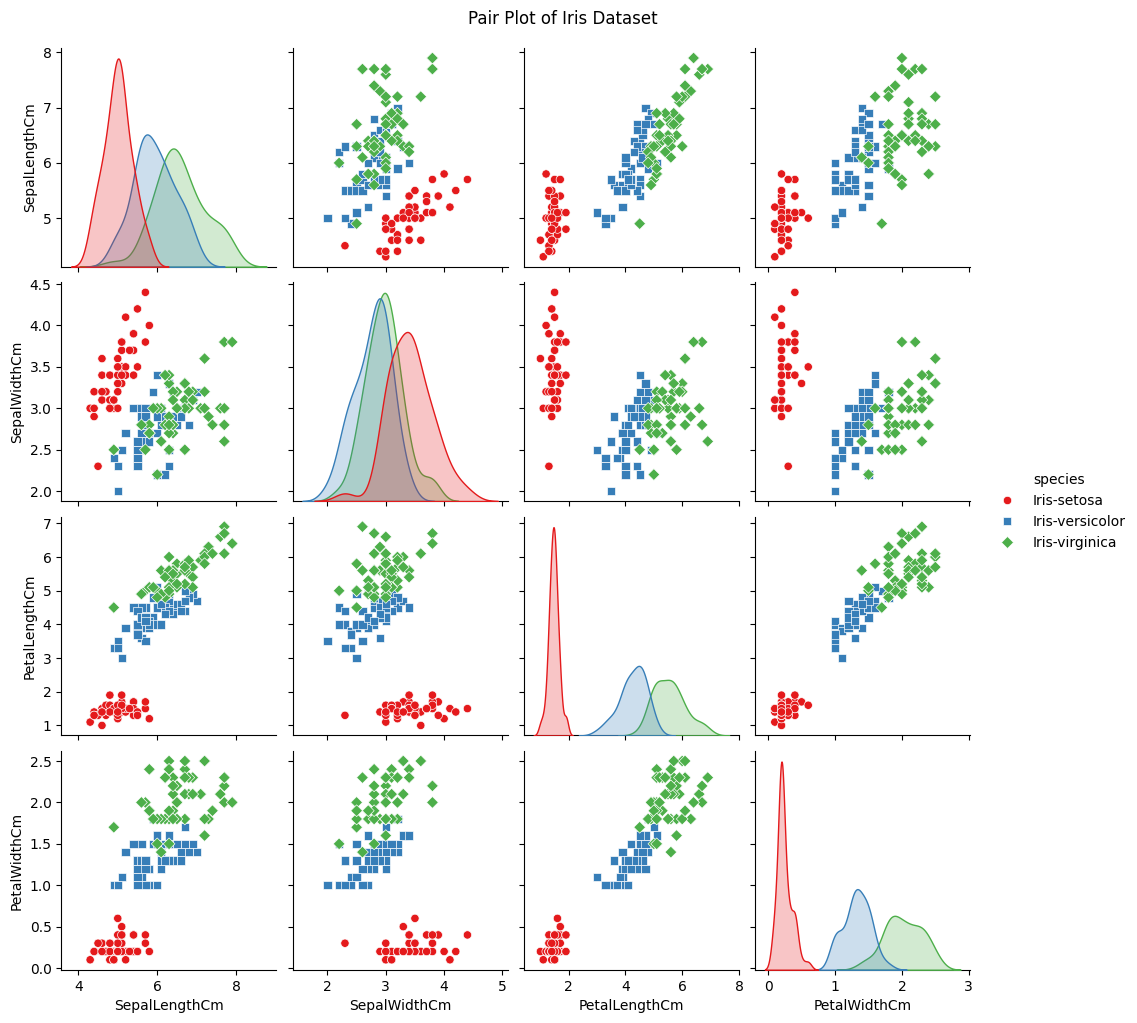


Logistic Regression Accuracy: 0.9
Naive Bayes Accuracy: 0.8333333333333334

Logistic Regression Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Naive Bayes Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.78      0.70      0.74        10
 Iris-virginica       0.73      0.80      0.76        10

       accuracy                           0.83        30
      macro avg       0.84      0.83      0.83        30
   weighted avg       0.84      0.83      0.83        30

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  8  2]
 [ 0  

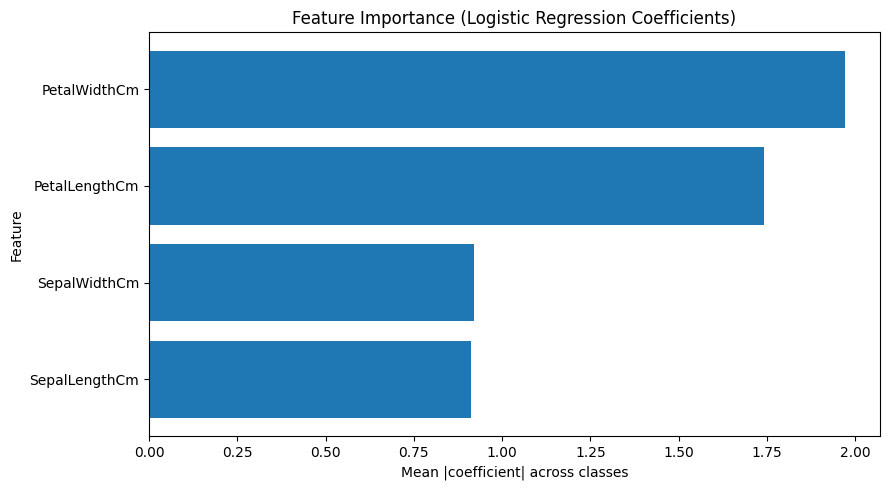

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  # tip: GaussianNB is often better for continuous features
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---- Load
df = pd.read_csv("iris.csv")
print("First 5 rows:\n", df.head())

# ---- Features/labels
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols].values
y = df['species'].values

print("Feature matrix shape:", X.shape, "| Target shape:", y.shape)

# ---- Quick EDA
sns.pairplot(
    df, vars=feature_cols, hue='species',
    diag_kind='kde', markers=['o', 's', 'D'], palette='Set1'
)
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

# ---- Scale → Split
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Models
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# ---- Metrics
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# ---- “Importance” from LR (mean |coef| across classes)
importances = np.mean(np.abs(log_reg.coef_), axis=0)
imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances}).sort_values('Importance')

plt.figure(figsize=(9, 5))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Mean |coefficient| across classes")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Import Necessary Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pandas as pd

## Load Dataset

In [26]:
df = pd.read_csv("iris.csv")

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Encode species column (converting categorical to numerical)

In [27]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

print("First 10 rows:")
display(df.head(10))

First 10 rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species,species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


## Separate features and target variable

In [28]:
X = df.drop(['species', 'species_encoded'], axis=1).values
y = df['species'].values
feature_names = df.drop(['species', 'species_encoded'], axis=1).columns
target_names = label_encoder.classes_

print("Feature names:", feature_names)
print("Target names:", target_names)
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature names: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
Target names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Feature matrix shape: (150, 5)
Target vector shape: (150,)


## Pair Plot to visualize the data

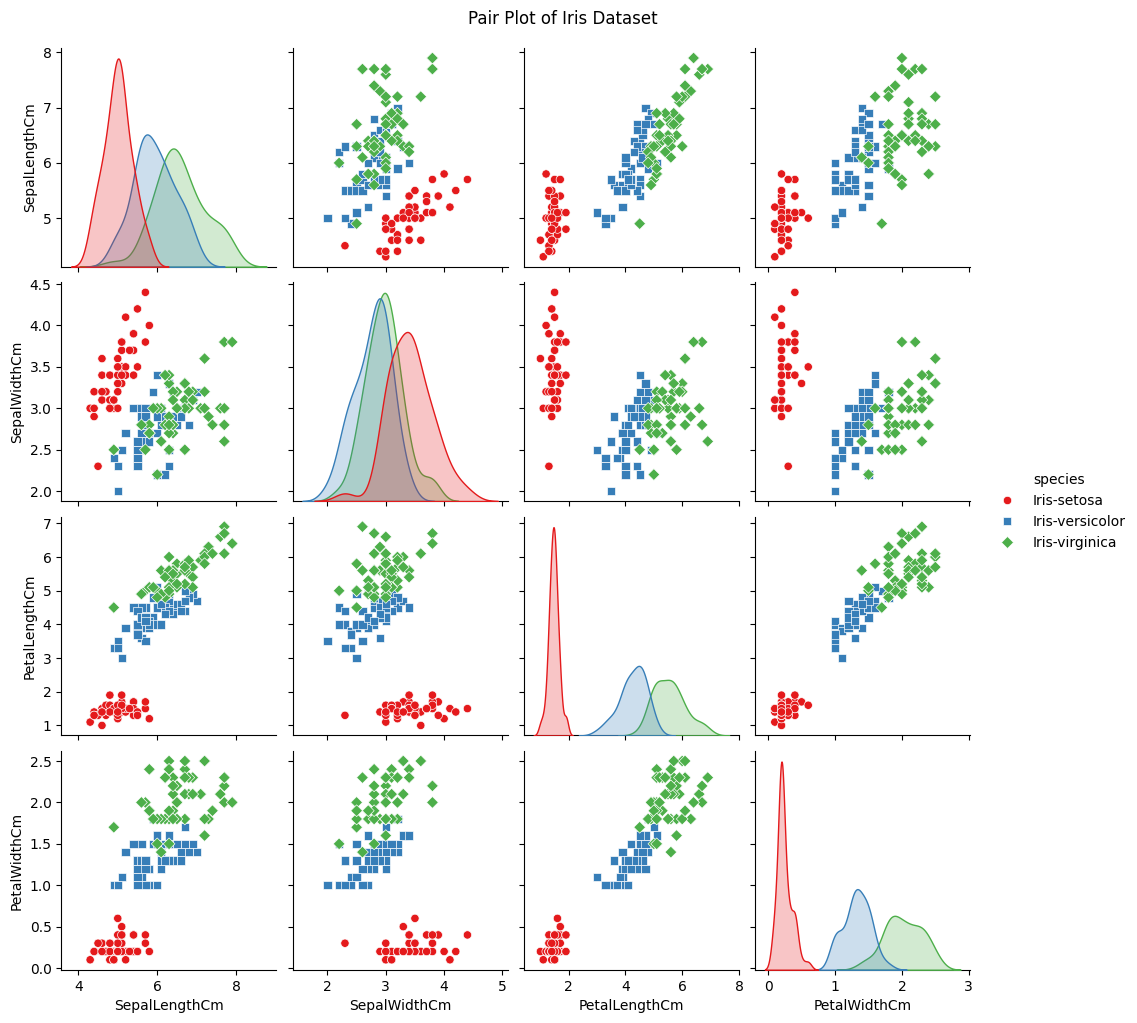

In [29]:
sns.pairplot(df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='species', diag_kind='kde', markers=['o', 's', 'D'], palette='Set1')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

## Train-Test Split

In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression Model

In [31]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

## Multinomial Naive Bayes Model

In [32]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

## Evaluate Models

In [33]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log, target_names=target_names))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb, target_names=target_names))

print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Logistic Regression Accuracy: 1.0
Naive Bayes Accuracy: 0.8666666666666667
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Naive Bayes Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.70      0.78        10
 Iris-virginica       0.75      0.90      0.82        10

       accuracy                           0.87        30
      macro avg       0.88      0.87      0.87        30
   weighted avg       0.88      0.87      0.87        30

Logistic Regression Confusion Matrix:
 [[

## Feature Importance Visualization

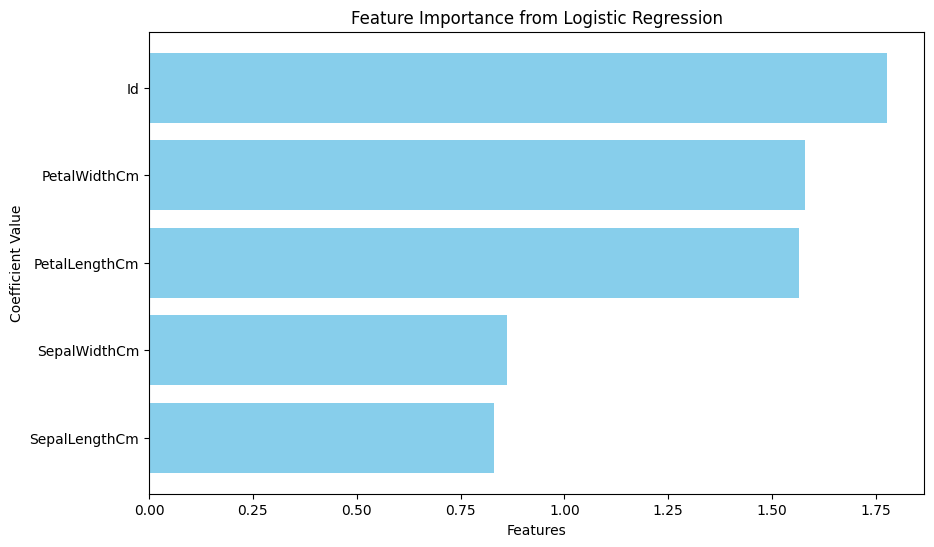

In [34]:
importances = np.mean(np.abs(log_reg.coef_), axis=0)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance from Logistic Regression")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.show()